In [3]:
import tweepy
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

In [4]:
ACCESS_TOKEN = "--"
ACCESS_SECRET_TOKEN = "--"
CONSUMER_KEY = "--"
CONSUMER_SECRET_KEY = "--"

In [5]:
clean_tweets_list = []
positive = 0
negative = 0
neutral = 0

Enter hashtag to search about : csgo
How many tweets to analyze? 10


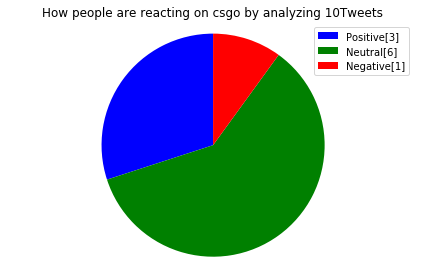

In [6]:
try: 
    # create OAuthHandler object 
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET_KEY) 
    # set access token and secret 
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET_TOKEN) 
    # create tweepy API object to fetch tweets 
    api = tweepy.API(auth) 
    
    searchTerm = input("Enter hashtag to search about : ")
    noOfSearchTerms = int(input("How many tweets to analyze? "))

    tweets = api.search(q = searchTerm, count = noOfSearchTerms)

    for each_tweet in range(len(tweets)):
        clean_tweets_list.append(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweets[each_tweet].text).split()))
    for i in range(len(clean_tweets_list)):    
        analysis = TextBlob(clean_tweets_list[i])
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            positive+=1
        elif analysis.sentiment.polarity == 0: 
            neutral+=1
        else: 
            negative+=1
    labels = ['Positive['+str(positive)+']','Neutral['+str(neutral)+']','Negative['+str(negative)+']']
    sizes = [positive,neutral,negative]
    colors = ['blue','green','red']
    patches,texts = plt.pie(sizes, colors = colors, startangle=90)
    plt.legend(patches,labels,loc ="best")
    plt.title("How people are reacting on " + searchTerm + " by analyzing " + str(noOfSearchTerms) + "Tweets")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
except: 
    print("Error: Authentication Failed") 